In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

In [2]:
def rmse(predictor,target):
    return np.sqrt(((predictor - target) ** 2).mean())

In [3]:
df = pd.read_csv('../data/train.csv')

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
#Check for any null values
df.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [7]:
#Fill the null values with 0

df.fillna(0, inplace= True)

In [8]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [9]:
df = df.astype({'Product_Category_2': int, 'Product_Category_3': int})

In [10]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969


In [11]:
#Mapping gender values
gender = {'F':0, 'M':1}

df['Gender'] = df['Gender'].map(gender)
df = df.rename(columns={'Gender': 'isMale'})

In [12]:
df.head()

,User_ID,Product_ID,isMale,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,0,0,7969


In [13]:
df.sort_values('Age', inplace=True)
df.head()

,User_ID,Product_ID,isMale,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,0,0,8370
48932,1001499,P00100442,1,0-17,10,C,1,0,2,4,5,13129
48933,1001499,P00255842,1,0-17,10,C,1,0,16,0,0,20195
48934,1001499,P00070342,1,0-17,10,C,1,0,1,2,14,15819
48935,1001499,P00275542,1,0-17,10,C,1,0,1,0,0,7587


In [14]:
df['Age'] = df['Age'].factorize()[0]

In [15]:
df.tail()

,User_ID,Product_ID,isMale,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
47161,1001252,P00357242,1,6,13,C,3,0,5,0,0,7134
47162,1001252,P00322942,1,6,13,C,3,0,2,8,16,16325
114629,1005686,P00101942,1,6,16,A,1,1,8,17,0,4056
188070,1005033,P00112342,0,6,13,C,1,1,13,16,0,936
132077,1002280,P00004142,1,6,6,B,2,1,8,17,0,7900


Mapping Age column to dummy values:

0-17: 0<br>
18-25: 1<br>
26-35: 2<br>
36-45: 3<br>

46-50: 4

51-55: 5

55+ : 6


In [16]:
city = {'A': 1, 'B': 2, 'C':3}

df['City_Category'] = df['City_Category'].map(city)

df.head()

,User_ID,Product_ID,isMale,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,1,2,0,3,0,0,8370
48932,1001499,P00100442,1,0,10,3,1,0,2,4,5,13129
48933,1001499,P00255842,1,0,10,3,1,0,16,0,0,20195
48934,1001499,P00070342,1,0,10,3,1,0,1,2,14,15819
48935,1001499,P00275542,1,0,10,3,1,0,1,0,0,7587


In [17]:
df['Stay_In_Current_City_Years'].replace({'4+':4}, inplace=True)

In [18]:
df['Product_ID'] = df['Product_ID'].str[1:] # Drop the first character ‘P’ from product id
df = df.astype({'Product_ID':int,'Stay_In_Current_City_Years':int}) # Recast all strings as ints

In [19]:
train, test = train_test_split(df,test_size=0.3)

In [20]:
X = train.drop('Purchase',axis=1)
y = train.Purchase

In [21]:
np.asarray(X)

array([[1001831,  238442,       1, ...,       6,       0,       0],
       [1000235,   86142,       1, ...,       5,       0,       0],
       [1003792,  161942,       1, ...,       5,       8,       0],
       ...,
       [1001579,  152442,       1, ...,       8,       0,       0],
       [1005912,  157642,       1, ...,       1,      14,      16],
       [1002496,  124142,       1, ...,      11,       0,       0]])

In [22]:
multivar_model = sm.OLS(y,sm.add_constant(X)).fit()

In [23]:
multivar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     6407.
Date:                Sat, 01 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:55:36   Log-Likelihood:            -3.7951e+06
No. Observations:              385047   AIC:                         7.590e+06
Df Residuals:                  385035   BIC:                         7.590e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1680.1019   4328.813     -0.388      0.698   -1.02e+04    6804.241
User_ID                        0.0113      0.004      2.621      0.009       0.003       0.020
Product_ID                    -0.0027   7.35e-05    -36.887      0.000      -0.003      -0.003
isMale                       498.1269     17.429     28.580      0.000     463.966     532.288
Age                          107.3883      5.864     18.314      0.000      95.895     118.881
Occupation                     6.0318      1.154      5.226      0.000       3.770       8.294
City_Category                320.1813      9.877     32.416      0.000     300.822     339.540
Stay_In_Current_City_Years     8.6505      5.776      1.498      0.134      -2.671      19.972
Marital_Status               -51.0989     15.924     -3.209      0.001     -82.310     -19.888
Product_Category_1          -344.2833      2.057   -167.372      0.000    -348.315    -340.252
Product_Category_2             9.4295      1.207      7.814      0.000       7.064      11.795
Product_Category_3           138.1116      1.303    105.965      0.000     135.557     140.666
==============================================================================
Omnibus:                    38721.660   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53244.991
Skew:                           0.817   Prob(JB):                         0.00
Kurtosis:                       3.806   Cond. No.                     5.93e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Sta_In_Current_City_Years has a p-value >= 0.05, so it will be dropped.

In [24]:
X = train.drop(columns=['Purchase','Stay_In_Current_City_Years'],axis=1)
X.head()

,User_ID,Product_ID,isMale,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
51185,1001831,238442,1,1,4,2,0,6,0,0
507999,1000235,86142,1,2,0,2,0,5,0,0
492097,1003792,161942,1,2,6,1,0,5,8,0
42547,1000549,364842,1,2,6,1,0,5,16,0
294122,1003389,246142,1,1,0,1,0,1,15,17


In [25]:
multivar_model = sm.OLS(y,sm.add_constant(X)).fit()
multivar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     7048.
Date:                Sat, 01 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:55:37   Log-Likelihood:            -3.7952e+06
No. Observations:              385047   AIC:                         7.590e+06
Df Residuals:                  385036   BIC:                         7.590e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1473.0829   4326.612     -0.340      0.734   -9953.113    7006.947
User_ID                0.0111      0.004      2.578      0.010       0.003       0.020
Product_ID            -0.0027   7.35e-05    -36.893      0.000      -0.003      -0.003
isMale               498.3820     17.429     28.596      0.000     464.222     532.542
Age                  107.3476      5.864     18.307      0.000      95.855     118.841
Occupation             6.0797      1.154      5.270      0.000       3.818       8.341
City_Category        320.4802      9.875     32.453      0.000     301.125     339.835
Marital_Status       -51.3578     15.923     -3.225      0.001     -82.567     -20.149
Product_Category_1  -344.2966      2.057   -167.380      0.000    -348.328    -340.265
Product_Category_2     9.4308      1.207      7.815      0.000       7.066      11.796
Product_Category_3   138.1077      1.303    105.962      0.000     135.553     140.662
==============================================================================
Omnibus:                    38719.953   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53241.863
Skew:                           0.817   Prob(JB):                         0.00
Kurtosis:                       3.806   Cond. No.                     5.92e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.92e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Human behavior is imprecise, so a lower R-squared may be OK so long as the independent variables are significant.

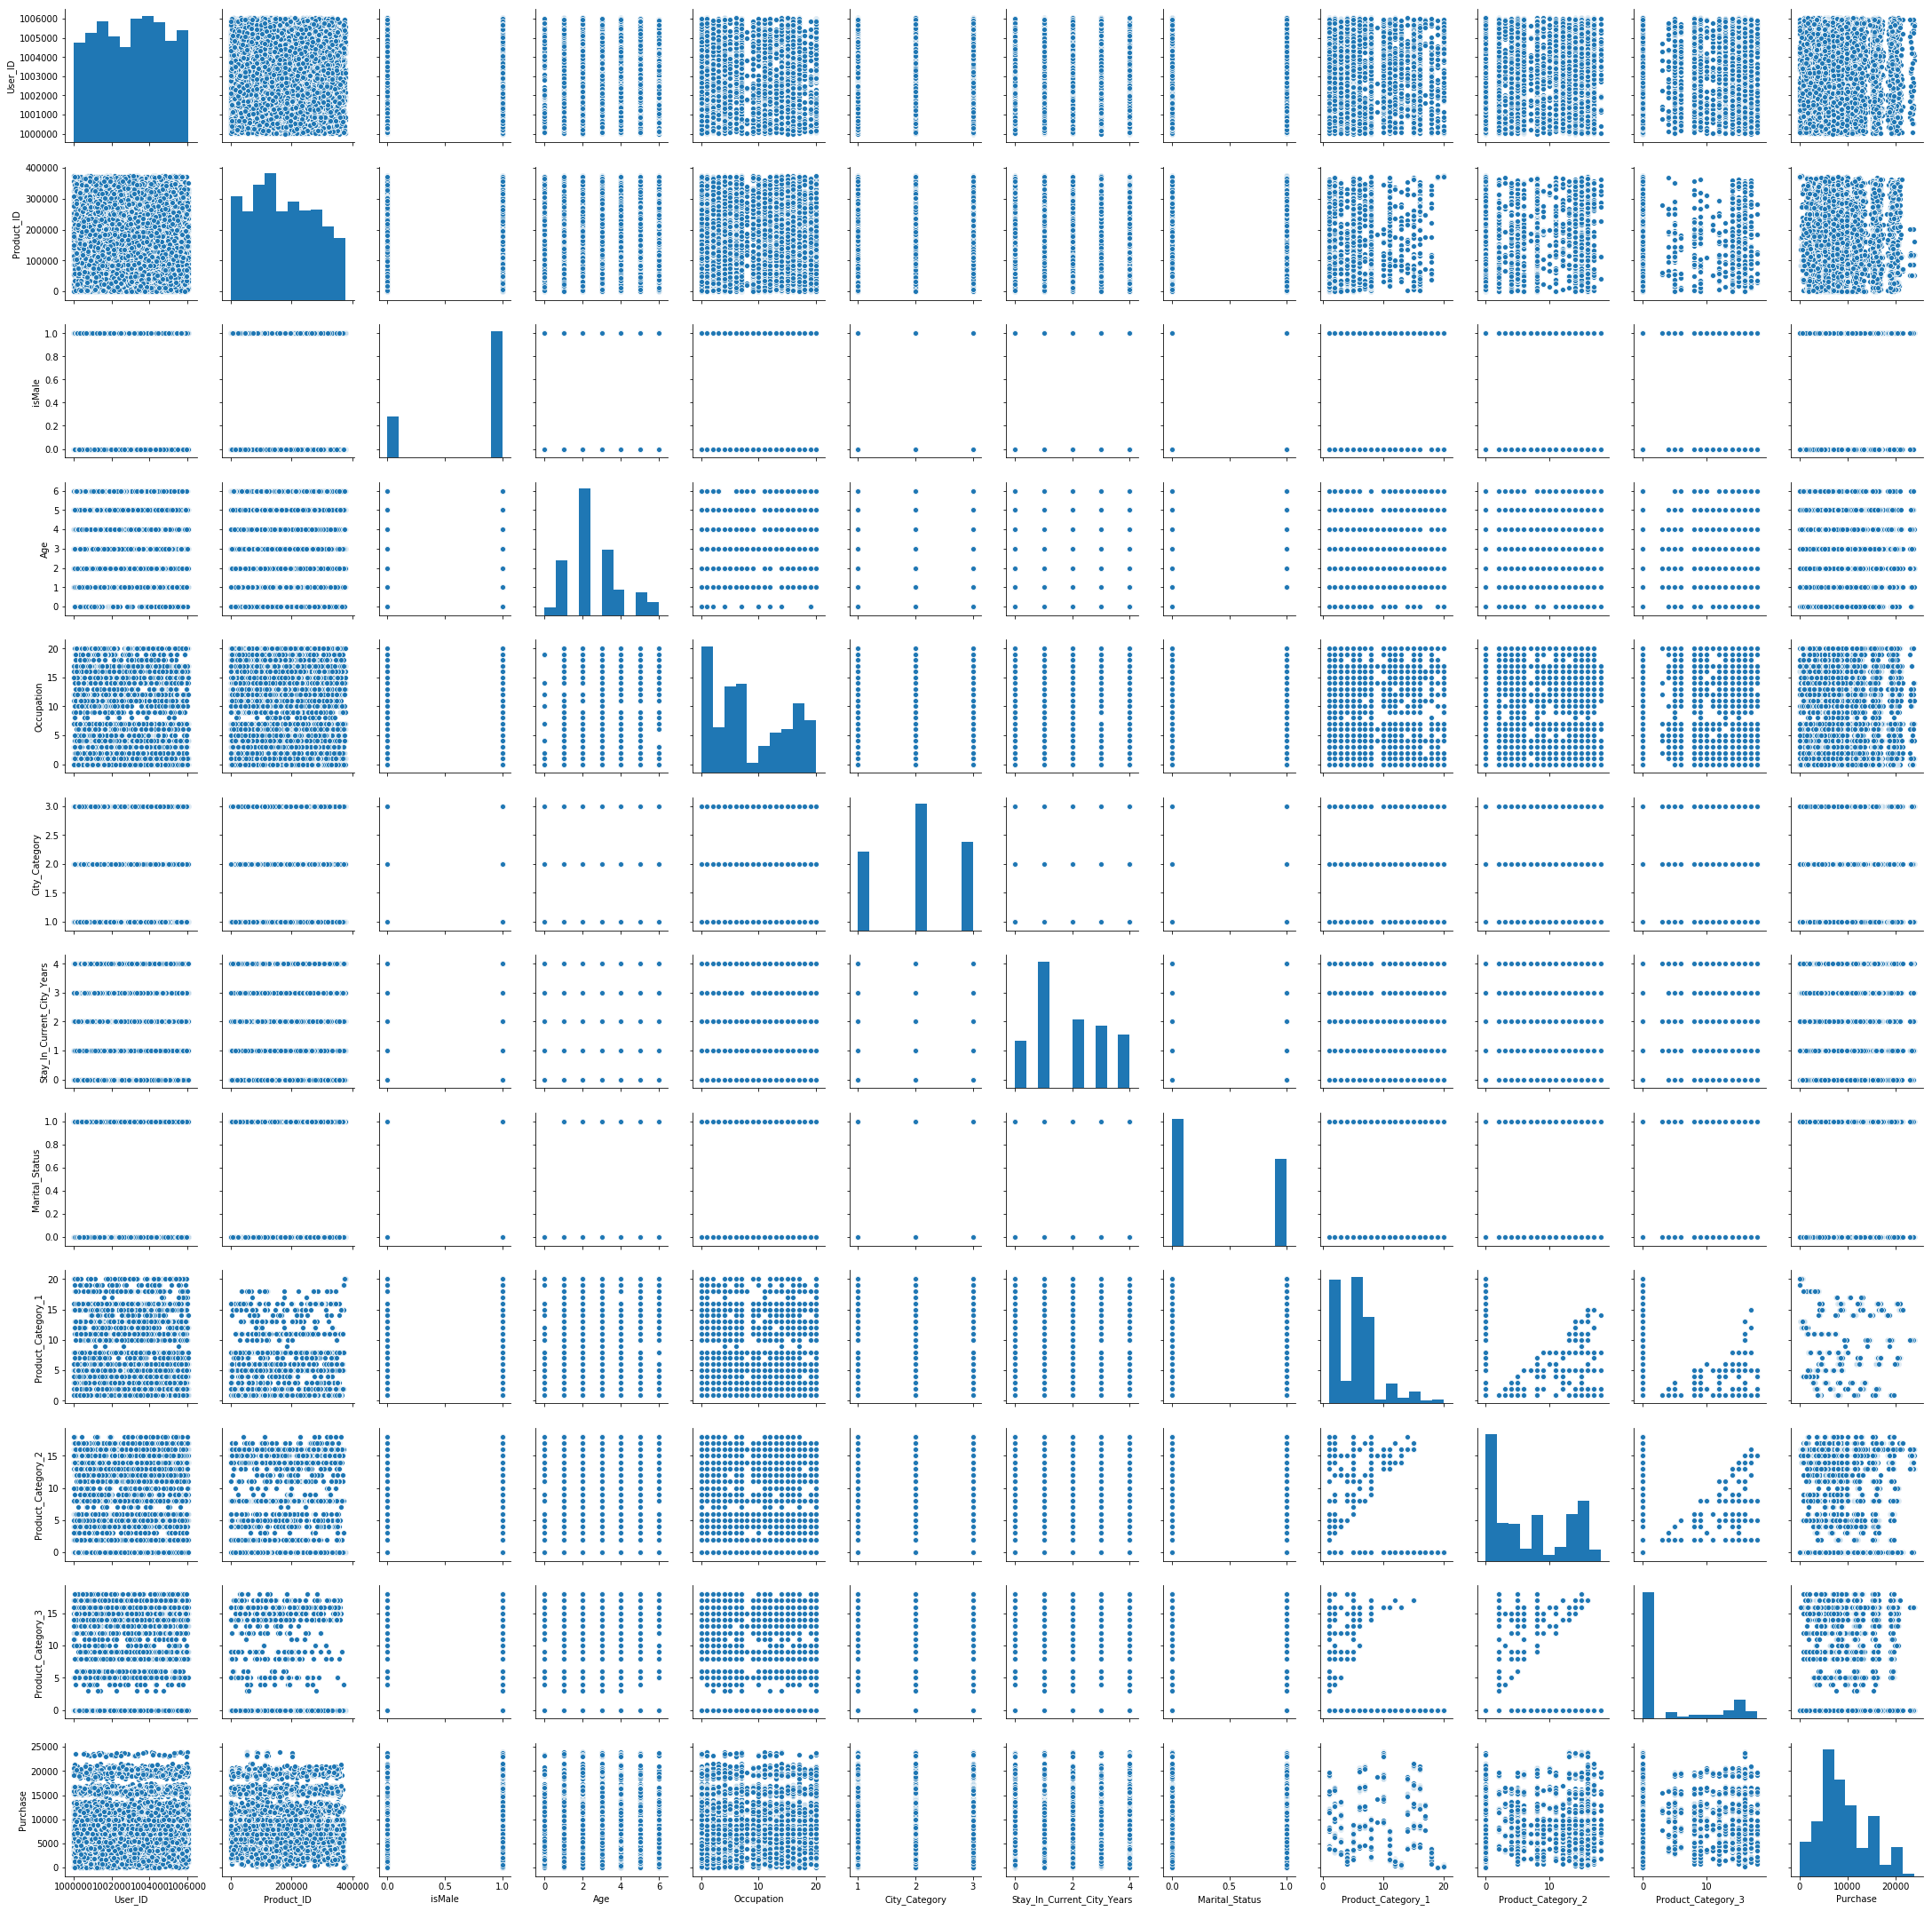

In [26]:
tempSlice = train.sample(n=10000) # Using a small slice to run a pairplot on - should give us an accurate idea of any relations while being efficient
sns.pairplot(tempSlice)

There appear to be relationships between the product categories.

In [27]:
prediction = multivar_model.predict(sm.add_constant(test.drop(columns=['Purchase','Stay_In_Current_City_Years'],axis=1)))

In [28]:
rmse(prediction,test['Purchase'])

4617.232162244771

Testing simple, single-var models

In [29]:
for c in df.columns:
    if (c == 'Purchase' or c == 'Stay_In_Current_City_Years'): continue
    X = train[c]
    y = train.Purchase
    model = sm.OLS(y,sm.add_constant(X)).fit()
    print(c)
    print('Adjusted R-Squared: '+str(model.rsquared_adj))
    prediction = model.predict(sm.add_constant(test[c]))
    print('RMSE: '+str(rmse(prediction,test['Purchase'])))
    print('\n')

User_ID
Adjusted R-Squared: 1.884784656924765e-05
RMSE: 5027.168895317392


Product_ID
Adjusted R-Squared: 0.010729322594580482
RMSE: 4999.54359234492


isMale
Adjusted R-Squared: 0.0036548232072494136
RMSE: 5018.159738190923


Age
Adjusted R-Squared: 0.00021610144452921531
RMSE: 5026.41967125319


Occupation
Adjusted R-Squared: 0.0004355813751510951
RMSE: 5026.162790611342


City_Category
Adjusted R-Squared: 0.00383902969473382
RMSE: 5017.633237409821


Marital_Status
Adjusted R-Squared: 3.413518341321975e-07
RMSE: 5027.257859864547


Product_Category_1
Adjusted R-Squared: 0.11765046410036928
RMSE: 4717.980474093474


Product_Category_2
Adjusted R-Squared: 0.0027757145648101833
RMSE: 5020.612897583281


Product_Category_3
Adjusted R-Squared: 0.08317954313061227
RMSE: 4813.160871372276




Simple models do not beat the basic multivariate model on RMSE.

Testing individual parameter transformations in a multivariate model.

In [30]:
df.User_ID.eq(0).any()

False

In [31]:
for c in df.columns:
    if (c == 'Purchase' or c == 'Stay_In_Current_City_Years'): continue
    print(c)
    for t in ['square','sqrt','log']:
        loopDf = df.copy()
        if t == 'square': loopDf[c+'_'+t] = loopDf[c]**2
        elif t == 'sqrt': loopDf[c+'_'+t] = np.sqrt(loopDf[c])
        elif t == 'log': 
            if loopDf[c].eq(0).any() == True: #np.log will throw a divide by 0 error if 0 exists
                print('0 in '+c+', skipping')
                continue
            else: loopDf[c+'_'+t] = np.log(loopDf[c])
        loopDf.drop(c,axis=1,inplace=True)
        loopTrain, loopTest = train_test_split(loopDf,test_size=0.3)
        X = loopTrain.drop(['Purchase','Stay_In_Current_City_Years'],axis=1)
        y = loopTrain.Purchase
        model = sm.OLS(y,sm.add_constant(X)).fit()
        print(t)
        print('Adjusted R-Squared: '+str(model.rsquared_adj))
        prediction = model.predict(sm.add_constant(loopTest.drop(['Purchase', 'Stay_In_Current_City_Years'],axis=1)))
        print('RMSE: '+str(rmse(prediction,loopTest['Purchase'])))
    print('\n')

User_ID
square
Adjusted R-Squared: 0.15713101679554953
RMSE: 4626.623736944273
sqrt
Adjusted R-Squared: 0.1550064049938653
RMSE: 4611.452096737603
log
Adjusted R-Squared: 0.15543518115157862
RMSE: 4615.71634434263


Product_ID
square
Adjusted R-Squared: 0.15617857108030897
RMSE: 4620.052536255292
sqrt
Adjusted R-Squared: 0.1544836653634084
RMSE: 4611.497099642594
log
Adjusted R-Squared: 0.15198720787348785
RMSE: 4615.3200801655685


isMale
square
Adjusted R-Squared: 0.15428868924757566
RMSE: 4608.81834338276
sqrt
Adjusted R-Squared: 0.1548124874597998
RMSE: 4604.54161763204
0 in isMale, skipping


Age
square
Adjusted R-Squared: 0.15507219357071422
RMSE: 4623.1939727330355
sqrt
Adjusted R-Squared: 0.1554363123451773
RMSE: 4623.794326411489
0 in Age, skipping


Occupation
square
Adjusted R-Squared: 0.155773407720728
RMSE: 4615.642953889848
sqrt
Adjusted R-Squared: 0.1550986245304382
RMSE: 4614.624509126831
0 in Occupation, skipping


City_Category
square
Adjusted R-Squared: 0.15568403293

Certain transformations improve the RMSE, particularly log(Product_Category_1).

In [36]:
freq = np.unique(train.Purchase,return_counts = True)[1]
unique = np.unique(train.Purchase,return_counts = True)[0]

[]

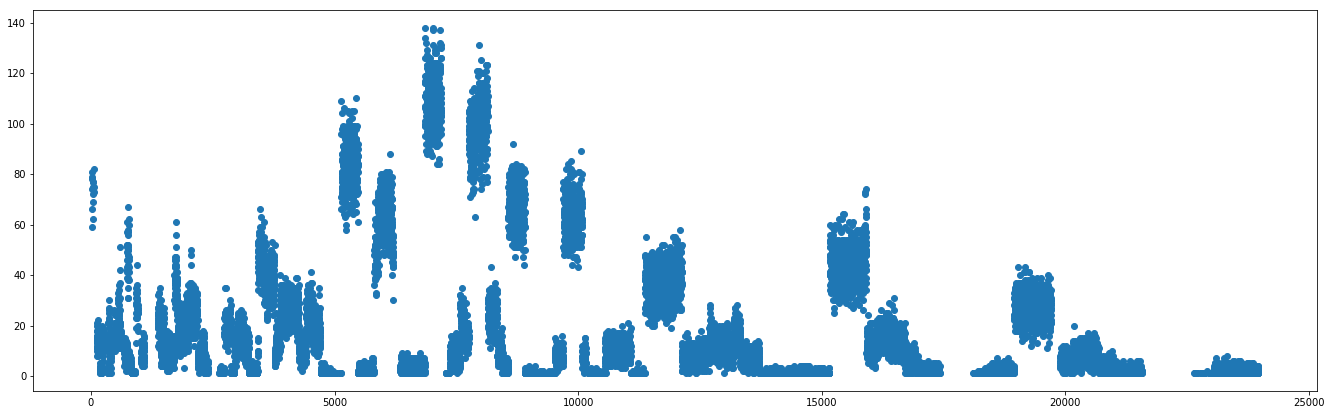

In [37]:
plt.figure(figsize=(23,7))
plt.scatter(unique,freq)
plt.plot()

Purchase numbers appear to be normally distributed until ~15000

In [38]:
lasso_model = LassoCV(alphas=np.logspace(-4,0,100),normalize=True,max_iter=100000,cv=5)
X = train.drop(columns=['Purchase','Stay_In_Current_City_Years'],axis=1)
y = train.Purchase

In [39]:
lasso_model.fit(X,y)

LassoCV(alphas=array([1.00000e-04, 1.09750e-04, ..., 9.11163e-01, 1.00000e+00]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=100000,
    n_alphas=100, n_jobs=None, normalize=True, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [40]:
lasso_predict = lasso_model.predict(test.drop(['Purchase','Stay_In_Current_City_Years'],axis=1))

In [41]:
print(rmse(lasso_predict,test.Purchase))

4617.23240037107


In [42]:
ridge_model = RidgeCV(alphas=np.logspace(-5,0,100),normalize=True)

In [43]:
ridge_model.fit(X,y)
ridge_predict = ridge_model.predict(test.drop(['Purchase','Stay_In_Current_City_Years'],axis=1))

In [44]:
print(rmse(ridge_predict,test.Purchase))

4617.233832885102


As per professor's suggestion, split on Purchase = 15000 (It's not exactly 15000, but close enough)

In [46]:
dfLow = df[(df.Purchase <= 15000)]
dfHigh = df[(df.Purchase > 15000)]

In [47]:
trainLow, testLow = train_test_split(dfLow,test_size=0.3)

In [48]:
Xlow = trainLow.drop(['Purchase','Stay_In_Current_City_Years'],axis=1)
yLow = trainLow.Purchase

In [49]:
multivar_model = sm.OLS(yLow,sm.add_constant(Xlow)).fit()

In [50]:
predict = multivar_model.predict(sm.add_constant(testLow.drop(['Purchase','Stay_In_Current_City_Years'],axis=1)))
print(rmse(predict,testLow.Purchase))

2862.1416270099658


In [51]:
multivar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     5271.
Date:                Sat, 01 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:56:48   Log-Likelihood:            -2.8864e+06
No. Observations:              307681   AIC:                         5.773e+06
Df Residuals:                  307670   BIC:                         5.773e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.393e+04   3008.187      4.631      0.000    8034.552    1.98e+04
User_ID               -0.0054      0.003     -1.810      0.070      -0.011       0.000
Product_ID            -0.0010   5.06e-05    -19.730      0.000      -0.001      -0.001
isMale                85.2899     11.895      7.170      0.000      61.977     108.603
Age                  101.1525      4.078     24.803      0.000      93.159     109.146
Occupation             0.4617      0.799      0.577      0.564      -1.105       2.029
City_Category        121.6830      6.884     17.676      0.000     108.191     135.175
Marital_Status       -10.3384     11.076     -0.933      0.351     -32.046      11.370
Product_Category_1  -291.8491      1.515   -192.675      0.000    -294.818    -288.880
Product_Category_2    -9.2277      0.832    -11.095      0.000     -10.858      -7.598
Product_Category_3    44.0242      0.965     45.601      0.000      42.132      45.916
==============================================================================
Omnibus:                      175.777   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.409
Skew:                           0.053   Prob(JB):                     1.34e-38
Kurtosis:                       2.950   Cond. No.                     5.92e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.92e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
trainHigh, testHigh = train_test_split(dfHigh,test_size=0.3)


In [53]:
Xhigh = trainHigh.drop(['Purchase','Stay_In_Current_City_Years'],axis=1)
yHigh = trainHigh.Purchase

In [54]:
multivar_model_high = sm.OLS(yHigh,sm.add_constant(Xhigh)).fit()

In [55]:
predict = multivar_model_high.predict(sm.add_constant(testHigh.drop(['Purchase','Stay_In_Current_City_Years'],axis=1)))
print(rmse(predict,testHigh.Purchase))

1969.6458605115101


In [56]:
multivar_model_high.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     1165.
Date:                Sat, 01 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:56:50   Log-Likelihood:            -6.9672e+05
No. Observations:               77366   AIC:                         1.393e+06
Df Residuals:                   77355   BIC:                         1.394e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.602e+04   4130.391      3.878      0.000    7923.990    2.41e+04
User_ID                0.0008      0.004      0.186      0.853      -0.007       0.009
Product_ID            -0.0028   7.37e-05    -37.447      0.000      -0.003      -0.003
isMale                 9.8996     18.075      0.548      0.584     -25.527      45.327
Age                    6.2226      5.604      1.110      0.267      -4.761      17.206
Occupation            -0.3256      1.115     -0.292      0.770      -2.512       1.861
City_Category         84.1337      9.380      8.970      0.000      65.750     102.518
Marital_Status        -8.0781     15.178     -0.532      0.595     -37.827      21.671
Product_Category_1   165.9318      1.744     95.168      0.000     162.514     169.349
Product_Category_2    35.0060      1.232     28.403      0.000      32.590      37.422
Product_Category_3     3.9002      1.096      3.559      0.000       1.752       6.048
==============================================================================
Omnibus:                    52259.399   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7773.066
Skew:                           0.516   Prob(JB):                         0.00
Kurtosis:                       1.839   Cond. No.                     5.92e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.92e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
new_df = pd.read_csv('../data/new_df.csv')

In [61]:
new_df.head()

,Unnamed: 0,User_ID_x,Product_ID_x,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,...,Max_purchase_price,Quantity_sold,Popular_item,Amount_user_spent,High_spender,User_category,Paid_more_avg,Num_Paid_more_avg,propHigh,F_prop
0,0,1000001,P00069042,F,0-17,10,A,2,0,3,...,13716,227,0,334093,0,1,0,19,0.542857,1.030861
1,1,1000017,P00069042,M,51-55,1,C,0,0,3,...,13716,227,0,1425995,0,5,1,85,0.739130,1.030861
2,2,1000023,P00069042,M,36-45,0,B,3,1,3,...,13716,227,0,1670998,0,6,0,60,0.350877,1.030861
3,3,1000030,P00069042,F,36-45,7,C,3,0,3,...,13716,227,0,261584,0,1,0,10,0.322581,1.030861
4,4,1000073,P00069042,M,18-25,4,A,4+,0,3,...,13716,227,0,1428303,0,5,0,70,0.522388,1.030861


In [62]:
new_df.fillna(0, inplace= True)

new_df = new_df.astype({'Product_Category_2': int, 'Product_Category_3': int})
#Mapping gender values
gender = {'F':0, 'M':1}

new_df['Gender'] = new_df['Gender'].map(gender)
new_df = new_df.rename(columns={'Gender': 'isMale'})

new_df.sort_values('Age', inplace=True)
new_df['Age'] = new_df['Age'].factorize()[0]

city = {'A': 1, 'B': 2, 'C':3}

new_df['City_Category'] = new_df['City_Category'].map(city)

new_df['Stay_In_Current_City_Years'].replace({'4+':4}, inplace=True)

new_df['Product_ID_x'] = new_df['Product_ID_x'].str[1:] # Drop the first character ‘P’ from product id
new_df = new_df.astype({'Product_ID_x':int,'Stay_In_Current_City_Years':int}) # Recast all strings as ints

In [63]:
new_df.drop('Unnamed: 0',axis=1,inplace=True)

In [64]:
newTrain, newTest = train_test_split(new_df, test_size=0.3)

In [65]:
newTrain.columns

Index(['User_ID_x', 'Product_ID_x', 'isMale', 'Age', 'Occupation',
       'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Purchase_price_x', 'User_prod_bought', 'Mean_Purchase_price',
       'Min_purchase_price', 'Max_purchase_price', 'Quantity_sold',
       'Popular_item', 'Amount_user_spent', 'High_spender', 'User_category',
       'Paid_more_avg', 'Num_Paid_more_avg', 'propHigh', 'F_prop'],
      dtype='object')

In [66]:
X = newTrain.drop('Purchase_price_x',axis=1)
y = newTrain.Purchase_price_x

In [67]:
multivar_model = sm.OLS(y,sm.add_constant(X)).fit()

In [68]:
multivar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Purchase_price_x   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                 1.159e+05
Date:                Sat, 01 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:57:02   Log-Likelihood:            -3.4222e+06
No. Observations:              385047   AIC:                         6.844e+06
Df Residuals:                  385022   BIC:                         6.845e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -2202.2419   1646.524     -1.338      0.181   -5429.380    1024.896
User_ID_x                     -0.0008      0.002     -0.490      0.624      -0.004       0.002
Product_ID_x                  -0.0001   2.83e-05     -4.341      0.000      -0.000   -6.74e-05
isMale                        -2.0473      6.955     -0.294      0.768     -15.679      11.584
Age                           -1.0343      2.253     -0.459      0.646      -5.451       3.382
Occupation                     0.3159      0.440      0.717      0.473      -0.547       1.179
City_Category                 44.5623      4.425     10.071      0.000      35.890      53.235
Stay_In_Current_City_Years     6.6180      2.195      3.014      0.003       2.315      10.921
Marital_Status                12.0736      6.057      1.993      0.046       0.203      23.945
Product_Category_1            -0.0670      0.863     -0.078      0.938      -1.759       1.625
Product_Category_2             3.8599      0.460      8.388      0.000       2.958       4.762
Product_Category_3             1.5619      0.519      3.008      0.003       0.544       2.580
User_prod_bought              -2.8572      0.098    -29.197      0.000      -3.049      -2.665
Mean_Purchase_price            0.9595      0.002    395.861      0.000       0.955       0.964
Min_purchase_price             0.0447      0.005      8.154      0.000       0.034       0.055
Max_purchase_price             0.0176      0.002      9.210      0.000       0.014       0.021
Quantity_sold                 -0.1297      0.016     -8.248      0.000      -0.161      -0.099
Popular_item                  84.3350     11.595      7.274      0.000      61.610     107.060
Amount_user_spent              0.0006   1.71e-05     34.419      0.000       0.001       0.001
High_spender                   6.9207     11.305      0.612      0.540     -15.238      29.079
User_category                -15.9946      2.558     -6.254      0.000     -21.007     -10.982
Paid_more_avg               3737.0496      6.018    620.960      0.000    3725.254    3748.845
Num_Paid_more_avg             -3.4606      0.127    -27.182      0.000      -3.710      -3.211
propHigh                    1871.4128     27.651     67.680      0.000    1817.218    1925.608
F_prop                      -100.9283     30.291     -3.332      0.001    -160.297     -41.559
==============================================================================
Omnibus:                    59900.914   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           247744.009
Skew:                          -0.726   Prob(JB):                         0.00
Kurtosis:                       6.652   Cond. No.                     1.50e+09
============================

In [69]:
predict = multivar_model.predict(sm.add_constant(newTest.drop('Purchase_price_x',axis=1)))
print(rmse(predict,newTest.Purchase_price_x))

1750.1623500191688


In [70]:
lasso_model.fit(X,y)

LassoCV(alphas=array([1.00000e-04, 1.09750e-04, ..., 9.11163e-01, 1.00000e+00]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=100000,
    n_alphas=100, n_jobs=None, normalize=True, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [71]:
lasso_predict = lasso_model.predict(newTest.drop('Purchase_price_x',axis=1))
print(rmse(lasso_predict,newTest.Purchase_price_x))

1750.1612122968088


In [72]:
df_reduced = new_df.copy()

In [73]:
df_reduced.drop(['User_ID_x','isMale','Age','Occupation','Stay_In_Current_City_Years','Marital_Status','High_spender'],axis=1,inplace=True)

In [74]:
reducedTrain, reducedTest = train_test_split(df_reduced,test_size = 0.3)

In [75]:
X = reducedTrain.drop('Purchase_price_x',axis=1)
y = reducedTrain.Purchase_price_x

In [76]:
multivar_model = sm.OLS(y,sm.add_constant(X)).fit()

In [78]:
multivar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Purchase_price_x   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                 1.637e+05
Date:                Sat, 01 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:57:27   Log-Likelihood:            -3.4218e+06
No. Observations:              385047   AIC:                         6.844e+06
Df Residuals:                  385029   BIC:                         6.844e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3027.9461     39.449    -76.756      0.000   -3105.265   -2950.627
Product_ID_x           -0.0001   2.82e-05     -4.102      0.000      -0.000   -6.05e-05
City_Category          42.0583      4.393      9.575      0.000      33.449      50.668
Product_Category_1      0.7209      0.863      0.835      0.404      -0.971       2.413
Product_Category_2      3.7945      0.460      8.257      0.000       2.894       4.695
Product_Category_3      0.9782      0.519      1.886      0.059      -0.038       1.995
User_prod_bought       -2.8190      0.095    -29.802      0.000      -3.004      -2.634
Mean_Purchase_price     0.9587      0.002    397.617      0.000       0.954       0.963
Min_purchase_price      0.0499      0.005      9.075      0.000       0.039       0.061
Max_purchase_price      0.0176      0.002      9.284      0.000       0.014       0.021
Quantity_sold          -0.1271      0.016     -8.104      0.000      -0.158      -0.096
Popular_item           83.3690     11.582      7.198      0.000      60.669     106.069
Amount_user_spent       0.0006   1.62e-05     36.329      0.000       0.001       0.001
User_category         -16.5118      2.534     -6.517      0.000     -21.478     -11.546
Paid_more_avg        3733.5152      6.012    621.012      0.000    3721.732    3745.299
Num_Paid_more_avg      -3.5063      0.123    -28.435      0.000      -3.748      -3.265
propHigh             1903.6560     27.409     69.453      0.000    1849.935    1957.377
F_prop                -80.5855     30.418     -2.649      0.008    -140.205     -20.966
==============================================================================
Omnibus:                    59713.737   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           244316.434
Skew:                          -0.726   Prob(JB):                         0.00
Kurtosis:                       6.622   Cond. No.                     4.15e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
predict = multivar_model.predict(sm.add_constant(reducedTest.drop('Purchase_price_x',axis=1)))
print(rmse(predict,reducedTest.Purchase_price_x))

1753.7437374434255


In [80]:
lasso_model.fit(X,y)

LassoCV(alphas=array([1.00000e-04, 1.09750e-04, ..., 9.11163e-01, 1.00000e+00]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=100000,
    n_alphas=100, n_jobs=None, normalize=True, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [81]:
lasso_predict = lasso_model.predict(reducedTest.drop('Purchase_price_x',axis=1))
print(rmse(lasso_predict,reducedTest.Purchase_price_x))

1753.7451783822169


In [84]:
for c in new_df.columns:
    if (c == 'Purchase_price_x'): continue
    print(c)
    for t in ['square','sqrt','log']:
        loopDf = new_df.copy()
        if t == 'square': loopDf[c+'_'+t] = loopDf[c]**2
        elif t == 'sqrt': loopDf[c+'_'+t] = np.sqrt(loopDf[c])
        elif t == 'log': 
            if loopDf[c].eq(0).any() == True: #np.log will throw a divide by 0 error if 0 exists
                print('0 in '+c+', skipping')
                continue
            else: loopDf[c+'_'+t] = np.log(loopDf[c])
        loopDf.drop(c,axis=1,inplace=True)
        loopTrain, loopTest = train_test_split(loopDf,test_size=0.3)
        X = loopTrain.drop('Purchase_price_x',axis=1)
        y = loopTrain.Purchase_price_x
        model = sm.OLS(y,sm.add_constant(X)).fit()
        print(t)
        print('Adjusted R-Squared: '+str(model.rsquared_adj))
        prediction = model.predict(sm.add_constant(loopTest.drop('Purchase_price_x',axis=1)))
        print('RMSE: '+str(rmse(prediction,loopTest['Purchase_price_x'])))
    print('\n')

User_ID_x
square
Adjusted R-Squared: 0.878015238531172
RMSE: 1750.1066710934333
sqrt
Adjusted R-Squared: 0.8782982348829611
RMSE: 1748.8949434499837
log
Adjusted R-Squared: 0.8783614938347124
RMSE: 1748.7227961694346


Product_ID_x
square
Adjusted R-Squared: 0.8784423773366528
RMSE: 1749.4707334851632
sqrt
Adjusted R-Squared: 0.8780976241570804
RMSE: 1751.398956412488
log
Adjusted R-Squared: 0.8786899750408386
RMSE: 1753.6528865544765


isMale
square
Adjusted R-Squared: 0.8785918869433151
RMSE: 1755.4418836209493
sqrt
Adjusted R-Squared: 0.8783571804289141
RMSE: 1752.69187638119
0 in isMale, skipping


Age
square
Adjusted R-Squared: 0.878047403769317
RMSE: 1746.8278861941758
sqrt
Adjusted R-Squared: 0.8785263208166726
RMSE: 1757.4498198087542
0 in Age, skipping


Occupation
square
Adjusted R-Squared: 0.8784936036359325
RMSE: 1756.6887864401792
sqrt
Adjusted R-Squared: 0.8788512179635348
RMSE: 1756.5895823679912
0 in Occupation, skipping


City_Category
square
Adjusted R-Squared: 0.8784